In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_created = pd.read_csv("./../result/data_created.csv")

In [3]:
X = data_created.loc[:, ["mvm", "sdvm", "df", "p625", "fpdf", "mangle", "sdangle"]]
Y = data_created.loc[:, "ActivityNumber"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 123, shuffle=True, stratify=Y)

In [4]:
clfs = []
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

clfs.append(lr)
clfs.append(svm)
clfs.append(rf)
clfs.append(dt)

In [5]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()),  # normalize data
    ('clf', SVC())  # fit Logistic regression model
])

In [6]:
for clf in clfs:
    pipeline.set_params(clf =  clf)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc_train = accuracy_score(pipeline.predict(X_train), y_train)
    acc_test = accuracy_score(y_test, y_pred)
    
    print("-----------------------------------------")
    print(str(clf))
    print("Accuracy of training set %f"%acc_train)
    print("Accuracy of test set %f"%acc_test)
    print(confusion_matrix(y_test, y_pred))
    #print("F1-score %f"%f1)
    #clf_disp = plot_roc_curve(pipeline, X_test, y_test)
    #plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    #plt.show()

-----------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy of training set 0.814978
Accuracy of test set 0.717105
[[ 9  3  5  0  0  0  0  0  0  0]
 [ 4  7  1  0  0  0  0  0  0  0]
 [ 1  0 19  4  0  0  0  0  0  0]
 [ 0  0  3 26  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  3]
 [ 0  0  0  3  0  0  0  8  1  0]
 [ 0  0  0  0  0  0  3  1  2  6]
 [ 0  0  0  0  0  0  4  0  1  7]]
-----------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_sta

In [7]:
# 

In [8]:
# PCA
X_r = PCA(n_components=2).fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X_r, Y, test_size = 0.4, random_state = 123, shuffle=True)

In [9]:
np.array(Y)

array([ 1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,
        6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10,  1,  1,
        1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,
        7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10,  1,  1,  1,  1,  1,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,
        9, 10, 10, 10,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,
        4,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9,
       10, 10, 10,  1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  6,  6,  6,  7,
        7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10,  1,  1,  1,  2,  2,  2,
        3,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,
        7,  8,  8,  8,  9,  9,  9, 10, 10, 10,  1,  1,  1,  1,  1,  2,  2,
        2,  3,  3,  3,  3

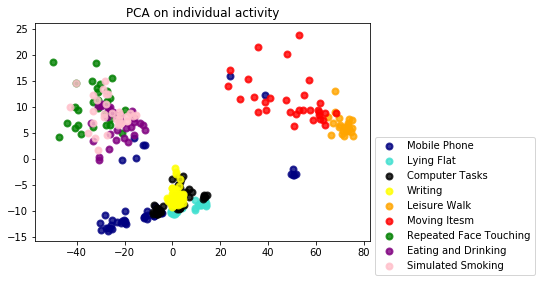

In [10]:
colors = ['navy', 'turquoise', 'black', 'yellow', 'orange', 'red', 'green', 'purple', 'pink']
#colors_test = ['yellow', 'red']
lw = 2
target_names = ['Mobile Phone',
                'Lying Flat',
                'Computer Tasks',
                'Writing',
                'Leisure Walk',
                'Moving Itesm',
                'Repeated Face Touching',
                'Eating and Drinking',
                'Simulated Smoking',
                'Adjusting Eyeglass']
Y = np.array(Y)
#target_names_test = ['non facetouching_test', 'facetouching_test']
for color, i, target_name in zip(colors, [i for i in range(1, 11)], target_names):
    plt.scatter(X_r[Y==i, 0], X_r[Y==i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)
'''
for color, i, target_name in zip(colors_test, [0, 1], target_names_test):
    plt.scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)
'''
plt.title("PCA on individual activity")
plt.legend(bbox_to_anchor=(1, 0.5), shadow=False)

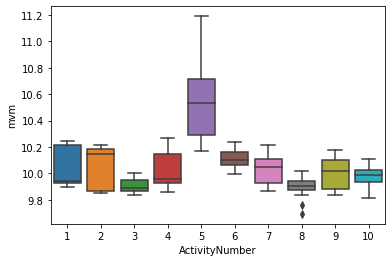

In [11]:
import seaborn as sns
ax = sns.boxplot(y="mvm", x="ActivityNumber", data=data_created)

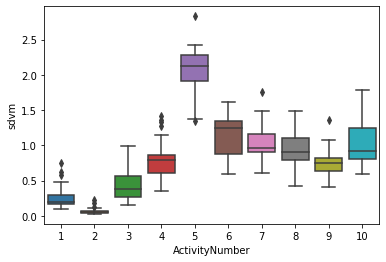

In [12]:
import seaborn as sns
ax = sns.boxplot(y="sdvm", x="ActivityNumber", data=data_created)

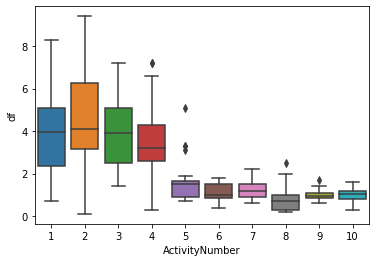

In [13]:
import seaborn as sns
ax = sns.boxplot(y="df", x="ActivityNumber", data=data_created)

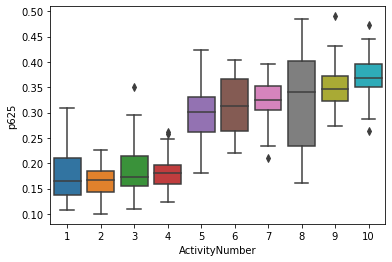

In [14]:
ax = sns.boxplot(y="p625", x="ActivityNumber", data=data_created)

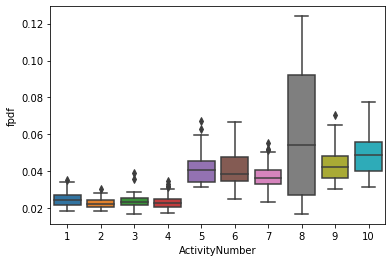

In [15]:
ax = sns.boxplot(y="fpdf", x="ActivityNumber", data=data_created)

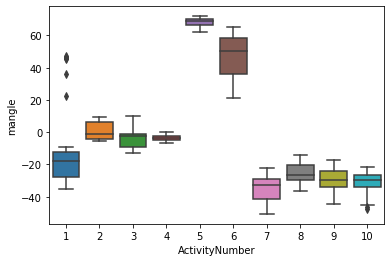

In [16]:
ax = sns.boxplot(y="mangle", x="ActivityNumber", data=data_created)

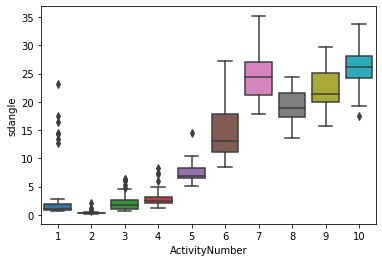

In [17]:
ax = sns.boxplot(y="sdangle", x="ActivityNumber", data=data_created)

In [18]:
# nested cross validation for Random Forest model

data_created = pd.read_csv("./../result/data_created.csv")

X = data_created.loc[:, ["mvm", "sdvm", "df", "p625", "fpdf", "mangle", "sdangle"]]
y = data_created.loc[:, "ActivityNumber"]

# configure the cross-validation procedure
cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
params = {
    'n_estimators' : [50, 100, 150, 200],
    'max_features' : ["auto", "sqrt", "log2"],
    'min_samples_leaf' : [1, 3, 5]
}

search = GridSearchCV(model, param_grid=params, scoring="accuracy",
                      n_jobs=1, cv = cv_inner, refit=True, verbose=10)

cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# scores for logistic regression
scores_rf = cross_validate(search, X, y, scoring = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"], 
                           return_train_score = True, cv=cv_outer, n_jobs=-1, verbose=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.5min remaining:   59.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


In [19]:

print("Accuracy on Training set: ", np.mean(scores_rf['train_accuracy']))
print("Accuracy on Test set: ", np.mean(scores_rf['test_accuracy']))
print("F1 score on Training set: ", np.mean(scores_rf['train_f1_macro']))
print("F1 score on Test set: ", np.mean(scores_rf['test_f1_macro']))
print("Precision on Training set: ", np.mean(scores_rf['train_precision_macro']))
print("Precision on Test set: ", np.mean(scores_rf['test_precision_macro']))
print("Recall on Training set: ", np.mean(scores_rf['train_recall_macro']))
print("Recall on Test set: ", np.mean(scores_rf['test_recall_macro']))
print("ROC-AUC on Training set: ", np.mean(scores_rf['train_roc_auc_ovr']))
print("ROC-AUC on Test set: ", np.mean(scores_rf['test_roc_auc_ovr']))


Accuracy on Training set:  1.0
Accuracy on Test set:  0.8310526315789474
F1 score on Training set:  1.0
F1 score on Test set:  0.8165986793230029
Precision on Training set:  1.0
Precision on Test set:  0.8400114166878871
Recall on Training set:  1.0
Recall on Test set:  0.8197142343380733
ROC-AUC on Training set:  1.0
ROC-AUC on Test set:  0.9858567839839043


In [20]:
# Logistic Regression
# Configure the cross-validation procedure

cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
# define the model
model = Pipeline([('normalizer', StandardScaler()),  # normalize data
                  ('clf', LogisticRegression(random_state=1))  # fit Logistic regression model
])

params = {
    'clf__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'clf__penalty' : ["l2"],
    'clf__C' : [100, 10, 1.0, 0.1, 0.01]
}

search = GridSearchCV(model, param_grid=params, scoring="accuracy",
                      n_jobs=1, cv = cv_inner, refit=True, verbose=10)

cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# scores for logistic regression
scores_lr = cross_validate(search, X, y, scoring = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"], 
                           return_train_score = True, cv=cv_outer, n_jobs=-1, verbose=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished


In [21]:
print("Accuracy on Training set: ", np.mean(scores_lr['train_accuracy']))
print("Accuracy on Test set: ", np.mean(scores_lr['test_accuracy']))
print("F1 score on Training set: ", np.mean(scores_lr['train_f1_macro']))
print("F1 score on Test set: ", np.mean(scores_lr['test_f1_macro']))
print("Precision on Training set: ", np.mean(scores_lr['train_precision_macro']))
print("Precision on Test set: ", np.mean(scores_lr['test_precision_macro']))
print("Recall on Training set: ", np.mean(scores_lr['train_recall_macro']))
print("Recall on Test set: ", np.mean(scores_lr['test_recall_macro']))
print("ROC-AUC on Training set: ", np.mean(scores_lr['train_roc_auc_ovr']))
print("ROC-AUC on Test set: ", np.mean(scores_lr['test_roc_auc_ovr']))

Accuracy on Training set:  0.8410304846274101
Accuracy on Test set:  0.7860701754385965
F1 score on Training set:  0.8456881328231672
F1 score on Test set:  0.778544564996013
Precision on Training set:  0.8461587271015245
Precision on Test set:  0.7996011501398499
Recall on Training set:  0.8466483872981257
Recall on Test set:  0.7800383534594062
ROC-AUC on Training set:  0.9878571199909502
ROC-AUC on Test set:  0.9778271750824972


In [22]:
# Support Vector Machine
# configure the cross-validation procedure
cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
# define the model
model = Pipeline([('normalizer', StandardScaler()),  # normalize data
                  ('clf', SVC(random_state=1, probability=True))  # fit Logistic regression model
])

params = {
    'clf__kernel' : ['poly', 'rbf', 'sigmoid'],
    'clf__gamma' : [100, 10, 1, 0.1, 0.01, 0.001],
    'clf__C' : [50, 10, 1.0, 0.1, 0.01, ]
}

search = GridSearchCV(model, param_grid=params, scoring="accuracy",
                      n_jobs=1, cv = cv_inner, refit=True, verbose=10)

cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# scores for logistic regression
scores_svm = cross_validate(search, X, y, scoring = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"], 
                           return_train_score = True, cv=cv_outer, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.7s remaining:   32.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   21.7s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.5s finished


In [23]:
print("Accuracy on Training set: ", np.mean(scores_svm['train_accuracy']))
print("Accuracy on Test set: ", np.mean(scores_svm['test_accuracy']))
print("F1 score on Training set: ", np.mean(scores_svm['train_f1_macro']))
print("F1 score on Test set: ", np.mean(scores_svm['test_f1_macro']))
print("Precision on Training set: ", np.mean(scores_svm['train_precision_macro']))
print("Precision on Test set: ", np.mean(scores_svm['test_precision_macro']))
print("Recall on Training set: ", np.mean(scores_svm['train_recall_macro']))
print("Recall on Test set: ", np.mean(scores_svm['test_recall_macro']))
print("ROC-AUC on Training set: ", np.mean(scores_svm['train_roc_auc_ovr']))
print("ROC-AUC on Test set: ", np.mean(scores_svm['test_roc_auc_ovr']))

Accuracy on Training set:  0.9399665624457183
Accuracy on Test set:  0.8838245614035088
F1 score on Training set:  0.9351931735350991
F1 score on Test set:  0.8715393500864088
Precision on Training set:  0.9370113465940134
Precision on Test set:  0.8881581401055085
Recall on Training set:  0.9352356816235616
Recall on Test set:  0.8749582289055973
ROC-AUC on Training set:  0.996383297257811
ROC-AUC on Test set:  0.9864877481500693


In [24]:
# Decision Tree
# configure the cross-validation procedure
cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
# define the model
model = DecisionTreeClassifier(random_state=1)

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12],
    'min_samples_leaf' : [6, 8]
}

search = GridSearchCV(model, param_grid=params, scoring="accuracy",
                      n_jobs=1, cv = cv_inner, refit=True, verbose=10)

cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# scores for logistic regression
scores_dt = cross_validate(search, X, y, scoring = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"], 
                           return_train_score = True, cv=cv_outer, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


In [25]:
print("Accuracy on Training set: ", np.mean(scores_dt['train_accuracy']))
print("Accuracy on Test set: ", np.mean(scores_dt['test_accuracy']))
print("F1 score on Training set: ", np.mean(scores_dt['train_f1_macro']))
print("F1 score on Test set: ", np.mean(scores_dt['test_f1_macro']))
print("Precision on Training set: ", np.mean(scores_dt['train_precision_macro']))
print("Precision on Test set: ", np.mean(scores_dt['test_precision_macro']))
print("Recall on Training set: ", np.mean(scores_dt['train_recall_macro']))
print("Recall on Test set: ", np.mean(scores_dt['test_recall_macro']))
print("ROC-AUC on Training set: ", np.mean(scores_dt['train_roc_auc_ovr']))
print("ROC-AUC on Test set: ", np.mean(scores_dt['test_roc_auc_ovr']))

Accuracy on Training set:  0.8449843668577385
Accuracy on Test set:  0.6990526315789474
F1 score on Training set:  0.8296694127674062
F1 score on Test set:  0.6710123049353094
Precision on Training set:  0.8402799986798494
Precision on Test set:  0.6973502249384602
Recall on Training set:  0.8340409034471191
Recall on Test set:  0.6962035771246298
ROC-AUC on Training set:  0.9865201591074063
ROC-AUC on Test set:  0.9209017335617672
